2021-09-27 03:58:24.474 
  command:

    streamlit run D:\Python\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2021-09-27 03:58:24.627 NumExpr defaulting to 4 threads.
2021-09-27 03:58:24.651 No handles with labels found to put in legend.
2021-09-27 03:58:24.651 No handles with labels found to put in legend.
2021-09-27 03:58:26.098 No handles with labels found to put in legend.
2021-09-27 03:58:26.098 No handles with labels found to put in legend.
2021-09-27 03:58:26.549 No handles with labels found to put in legend.
2021-09-27 03:58:26.549 No handles with labels found to put in legend.
2021-09-27 03:58:26.959 No handles with labels found to put in legend.
2021-09-27 03:58:26.959 No handles with labels found to put in legend.


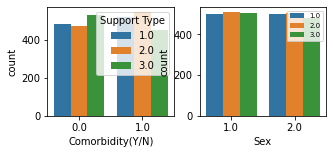

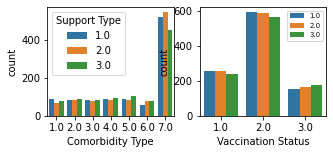

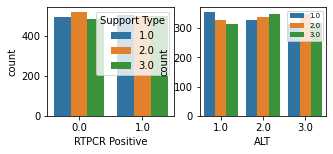

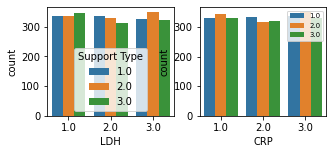

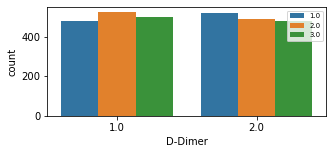

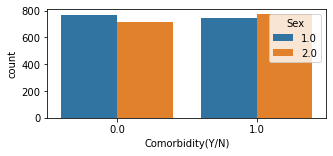

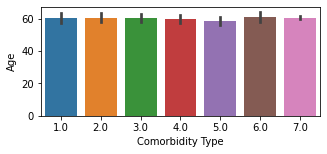

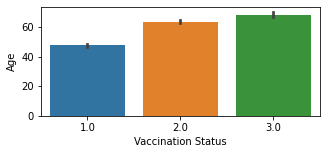

In [1]:
"""
Created on Mon Sep 13 17:23:37 2021
@author: Lenovo
"""

# -*- coding: utf-8 -*-
"""
"""
import streamlit as st
import pandas as pd
import numpy as np
from PIL import Image


import plotly.graph_objects as go
import  matplotlib.pyplot as plt
import seaborn as sns


st.title("Exploratory Data Analysis on COVID-19")

"""The given dashboard assist to visualize about the impact of 
several predictors on responses and among themselves. 
The responses involve Severity,Hospitalzation and Support Type.There are eleven
predictors - Age,Sex,Cormorbidity(Y/N),Comorbidity Type,Duration of Comorbidity,
RTPCR Positive, Vaccination Status, ALT, CRP, LDH, D-Dimer
"""
from tabulate import tabulate
st.header(" Categories of Categorical Variables")
table= pd.DataFrame([['Sex', 'Comorbdity (Y/N)', 'Vaccination Status','RTPCR Positive ','D-Dimer','ALT','CRP','LDH','Severity','Hospitalization Reqd','Support Type'], ['1- Male', '1-Yes', '1-No Dose','0-Yes','1-Normal','1-Normal','1-Normal','1-Normal','1-Low','1-No','1-Normal'], ['2-Female', '2-No', '2-One Dose','1-No','2-Positive','2-Mild','2-Mild','2-Mild','2-Moderate','2-Yes','2-Oxygen support'], ['', '', '3-Two Dose','','','3-High','3-High','3-High','3-High','','3-Critical Support']])
st.table(table)
st.sidebar.title("Selection ")


df= pd.read_csv("C:/Users/Lenovo/data/Covid data.csv")
   
df.fillna({"Duration of Comorbidity":0,"Comorbidity Type":7},inplace=True)

     
df["Comorbidity(Y/N)"]=df["Comorbidity(Y/N)"].replace({1:0,2:1})
df["RTPCR Positive"]=df["RTPCR Positive"].replace({1:0,2:1})
df.drop(["Region"],axis=1,inplace=True)
# Center
st.header("Database")
st.write(df)

#Sidebar
# Response v/s predictors 

st.sidebar.subheader("Response ")

selected = st.sidebar.selectbox("Select Response Category",('Support Type','Hospitalization Reqd','Severity'))
st.sidebar.write(f"You selected {selected}")

st.subheader("Plot of "+selected + "  v/s Predictors")
fig, axes = plt.subplots(1,2,figsize=(5,2))


ax = sns.countplot(ax=axes[0],data=df , x = 'Comorbidity(Y/N)',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")

ax = sns.countplot(ax=axes[1],data=df , x = 'Sex',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
st.pyplot(fig)

fig, axes = plt.subplots(1,2,figsize=(5,2))

ax = sns.countplot(ax=axes[0],data=df , x = 'Comorbidity Type',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
ax = sns.countplot(ax=axes[1],data=df , x = 'Vaccination Status',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
st.pyplot(fig)

fig, axes = plt.subplots(1,2,figsize=(5,2))
ax = sns.countplot(ax=axes[0],data=df , x = 'RTPCR Positive',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
ax = sns.countplot(ax=axes[1],data=df , x = 'ALT',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
st.pyplot(fig)

fig, axes = plt.subplots(1,2,figsize=(5,2))
ax = sns.countplot(ax=axes[0],data=df , x = 'LDH',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
ax = sns.countplot(ax=axes[1],data=df , x = 'CRP',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
st.pyplot(fig)

fig, axes = plt.subplots(figsize=(5,2))
sns.countplot(data=df , x = 'D-Dimer',hue = selected)
plt.legend(prop={"size":10})
plt.legend(fontsize="x-small")
st.pyplot(fig)


# Plot of predictors
"""
All Predictors have been plotted against Sex and RTPCR. 
"""
st.sidebar.subheader("Predictors")
st.header("Plot of Predictor")


#p1=st.sidebar.selectbox(" Choose predictor ",)





select1 = st.sidebar.selectbox("Choose Predictor 1",("Sex","RTPCR Positive"))
select2 = st.sidebar.selectbox("Choose predictor 2 ",("Comorbidity(Y/N)","Comorbidity Type","Vaccination Status",'D-Dimer','ALT','CRP','LDH'))

fig,axes =plt.subplots(figsize=(5,2))

sns.countplot(data=df , x = select2,hue = select1)

st.pyplot(fig)
st.header("Miscellaneous Plot")
st.sidebar.header("Miscellaneous Plot")
s3=st.sidebar.selectbox("Choose Plot",("barplot","boxplot","histogram"))
if s3 == "histogram" :
    fig, axes = plt.subplots(figsize=(5,2))
    plt.hist(df["Duration of Comorbidity"])
    plt.xlabel("Duration of Comorbidity(Years)")
    plt.ylabel("No. of persons")
    st.pyplot(fig)
    
    
    fig, axes = plt.subplots(figsize=(5,2))
    plt.hist(df["Comorbidity Type"])
    plt.xlabel("Comorbidity Type")
    st.pyplot(fig)
    

    
if s3 == "barplot":
    fig, axes = plt.subplots(figsize=(5,2))
    sns.barplot(data=df,x="Comorbidity Type",y="Age")
    st.pyplot(fig)
    
    fig, axes = plt.subplots(figsize=(5,2))
    sns.barplot(data=df,x="Vaccination Status",y="Age",ci=95)
    st.pyplot(fig)
    
if s3 == "boxplot":
    fig, axes = plt.subplots(figsize=(5,2))
    sns.boxplot(data=df,x="Severity",y="Age",hue="Sex")
    st.pyplot(fig)
    
    fig, axes = plt.subplots(figsize=(5,2))
    sns.boxplot(data=df,x="Hospitalization Reqd",y="Age",hue="Sex")
    st.pyplot(fig)
    
    fig, axes = plt.subplots(figsize=(5,2))
    sns.boxplot(data=df,x="Support Type",y="Age",hue="Sex")
    st.pyplot(fig)
    
    
    